   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 48.7 MB/s eta 0:00:00
==== Restaurant Tipping System ====
Service Quality: 4.7
Food Quality: 8.1
Tip Amount: 15.37

==== ABS Brake System ====
Car Speed: 85 km/h
Wheel Slip: 6
Brake Pressure: 30.25


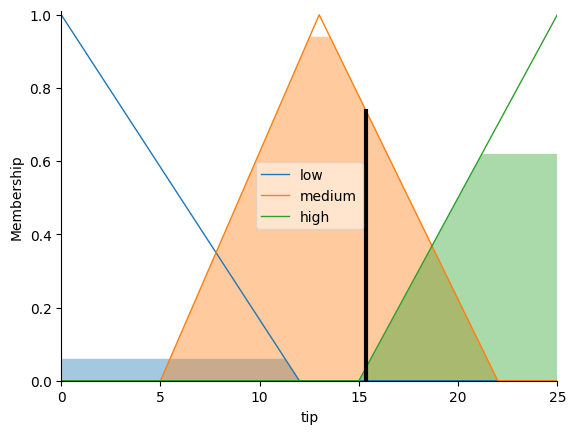

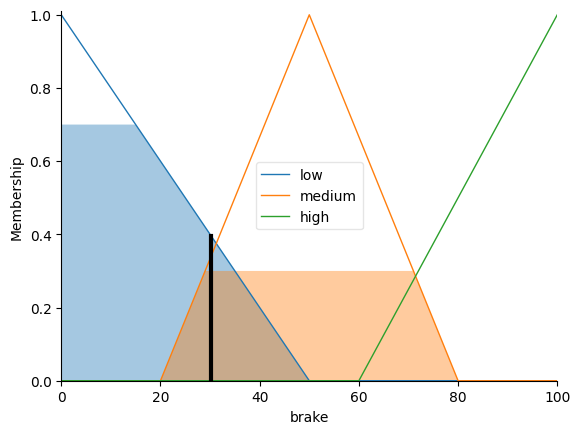

In [1]:
# Install fuzzy library
!pip install scikit-fuzzy

# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# ============================================================
#                RESTAURANT TIPPING SYSTEM
# ============================================================

def restaurant_tipping():

    # Input & Output variables
    service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
    food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
    tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

    # Membership functions for inputs
    service.automf(3)     # poor, average, good
    food.automf(3)

    # Membership functions for tip output
    tip['low'] = fuzz.trimf(tip.universe, [0, 0, 12])
    tip['medium'] = fuzz.trimf(tip.universe, [5, 13, 22])
    tip['high'] = fuzz.trimf(tip.universe, [15, 25, 25])

    # Fuzzy rules
    rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
    rule2 = ctrl.Rule(service['average'], tip['medium'])
    rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

    # Control system
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

    # Changed input values (for different output)
    tipping.input['service'] = 4.7      # changed value
    tipping.input['food'] = 8.1         # changed value

    # Compute result
    tipping.compute()

    # Print result
    print("==== Restaurant Tipping System ====")
    print(f"Service Quality: 4.7")
    print(f"Food Quality: 8.1")
    print(f"Tip Amount: {tipping.output['tip']:.2f}")

    # Show graph
    tip.view(sim=tipping)



# ============================================================
#                ABS BRAKE SYSTEM
# ============================================================

def abs_brake_system():

    # Input & Output variables
    speed = ctrl.Antecedent(np.arange(0, 101, 1), 'speed')
    slip = ctrl.Antecedent(np.arange(0, 11, 1), 'slip')
    brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

    # Membership functions for input
    speed.automf(3)   # poor, average, good
    slip.automf(3)

    # Membership functions for brake output
    brake['low'] = fuzz.trimf(brake.universe, [0, 0, 50])
    brake['medium'] = fuzz.trimf(brake.universe, [20, 50, 80])
    brake['high'] = fuzz.trimf(brake.universe, [60, 100, 100])

    # Fuzzy rules
    rule1 = ctrl.Rule(speed['poor'] | slip['poor'], brake['high'])
    rule2 = ctrl.Rule(speed['average'], brake['medium'])
    rule3 = ctrl.Rule(speed['good'] | slip['good'], brake['low'])

    # Control system
    braking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    braking = ctrl.ControlSystemSimulation(braking_ctrl)

    # Changed input values (for different output)
    braking.input['speed'] = 85     # changed value
    braking.input['slip'] = 6       # changed value

    # Compute result
    braking.compute()

    # Print result
    print("\n==== ABS Brake System ====")
    print(f"Car Speed: 85 km/h")
    print(f"Wheel Slip: 6")
    print(f"Brake Pressure: {braking.output['brake']:.2f}")

    # Show graph
    brake.view(sim=braking)



# ============================================================
#                   RUN BOTH SYSTEMS
# ============================================================

restaurant_tipping()
abs_brake_system()

plt.show()
